Import Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

Additional Settings

In [3]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","loans" ,"persloans", "agloans", "reloans", "ciloans"]]

Get x-axis labels

In [5]:
df_forLabels = df.sort_values(by=["year", "quarter"])
df_forLabels = df_forLabels[["year", "quarter"]]
df_forLabels = df_forLabels.drop_duplicates()
labels = []
for row in df_forLabels.itertuples():
    dictRow = row._asdict()
    labels.append(str(dictRow["year"]) + "/" + str(dictRow["quarter"]))
ser_labels = pd.Series(labels)
ser_labels.index

RangeIndex(start=0, stop=152, step=1)

In [6]:
pivot = pd.pivot_table(df, index=["year", "quarter"], values=["loans","persloans", "agloans", "reloans", "ciloans"], aggfunc={"agloans": np.sum, "ciloans": np.sum, "loans": np.sum,"persloans": np.sum, "reloans": np.sum})
#fig, ax = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,150,10))
years = [str(year) for year in range(1975, 2014)]
pivot
#ax.set_xticklabels(years, rotation=60)
#pivot.plot(ax=ax)
#print(type(pivot.loans))
#print(pivot.loans)
#ax.set_xticklabels(labels, rotation=60)
#ax.plot(pivot)

agloans       ciloans         loans     persloans       reloans
year   quarter                                                                    
1976.0 1.0      20441221.0  1.676811e+08  4.979078e+08  1.060998e+08  1.376262e+08
       2.0      22177608.0  1.702594e+08  5.121950e+08  1.105997e+08  1.423676e+08
       3.0      22891098.0  1.703788e+08  5.198481e+08  1.151447e+08  1.447915e+08
       4.0      23236481.0  1.780387e+08  5.413140e+08  1.185939e+08  1.501127e+08
1977.0 1.0      23679447.0  1.794227e+08  5.443855e+08  1.203665e+08  1.527350e+08
       2.0      25654452.0  1.847227e+08  5.691111e+08  1.282208e+08  1.606904e+08
       3.0      26282762.0  1.873944e+08  5.894286e+08  1.349610e+08  1.698303e+08
       4.0      25738061.0  1.963861e+08  6.174419e+08  1.409665e+08  1.776548e+08
1978.0 1.0      25430487.0  2.019310e+08  6.254696e+08  1.434821e+08  1.822649e+08
       2.0      27004808.0  2.114837e+08  6.609582e+08  1.540780e+08  1.920315e+08
       3.0      28061878.0  2.136983e+08  6.857319e+08  1.622529e+08  2.027878e+08
       4.0      28644625.0  3.084827e+08  8.594126e+08  1.718011e+08  2.169374e+08
1979.0 1.0      28568803.0  3.150647e+08  8.658298e+08  1.740961e+08  2.226560e+08
       2.0      30246358.0  3.295213e+08  9.064511e+08  1.827398e+08  2.320669e+08
       3.0      31278178.0  3.415252e+08  9.395805e+08  1.891959e+08  2.423246e+08
       4.0      31429442.0  3.507394e+08  9.652473e+08  1.926479e+08  2.488118e+08
1980.0 1.0      31034808.0  3.553541e+08  9.711778e+08  1.894684e+08  2.545423e+08
       2.0      31669404.0  3.623253e+08  9.781737e+08  1.849286e+08  2.572971e+08
       3.0      32273954.0  3.728004e+08  9.987059e+08  1.859509e+08  2.624784e+08
       4.0      32283570.0  3.908470e+08  1.036911e+09  1.874048e+08  2.686496e+08
1981.0 1.0      32044443.0  3.938253e+08  1.038640e+09  1.829522e+08  2.723027e+08
       2.0      33934357.0  4.109977e+08  1.075055e+09  1.858841e+08  2.786202e+08
       3.0      34323327.0  4.290762e+08  1.110798e+09  1.898194e+08  2.855352e+08
       4.0      33651773.0  4.545068e+08  1.152175e+09  1.928928e+08  2.910453e+08
1982.0 1.0      34033761.0  4.665138e+08  1.163195e+09  1.889862e+08  2.957412e+08
       2.0      36514798.0  4.827501e+08  1.195489e+09  1.920335e+08  3.004897e+08
       3.0      37684890.0  4.955164e+08  1.220066e+09  1.951931e+08  3.044615e+08
       4.0      36997694.0  5.039821e+08  1.244356e+09  1.990085e+08  3.075774e+08
1983.0 1.0      37188834.0  5.056254e+08  1.242586e+09  1.957102e+08  3.101873e+08
       2.0      39234165.0  5.060385e+08  1.264439e+09  2.027290e+08  3.174297e+08
       3.0      39933165.0  5.068143e+08  1.284405e+09  2.124443e+08  3.270850e+08
       4.0      39875743.0  5.242839e+08  1.333719e+09  2.242292e+08  3.355642e+08
1984.0 1.0      40137879.0  5.350201e+08  1.396263e+09  2.266319e+08  3.478052e+08
       2.0      42181327.0  5.531802e+08  1.448122e+09  2.402929e+08  3.613137e+08
       3.0      42364096.0  5.528023e+08  1.472445e+09  2.517678e+08  3.724462e+08
       4.0      40380789.0  5.650937e+08  1.525527e+09  2.663935e+08  3.845076e+08
1985.0 1.0      38968524.0  5.685899e+08  1.535034e+09  2.721029e+08  3.935735e+08
       2.0      40466401.0  5.707313e+08  1.569728e+09  2.845533e+08  4.063826e+08
       3.0      39706640.0  5.744284e+08  1.607008e+09  2.968358e+08  4.224016e+08
       4.0      36105573.0  5.772415e+08  1.645063e+09  3.078026e+08  4.368293e+08
1986.0 1.0      34344965.0  5.797833e+08  1.654673e+09  3.076195e+08  4.497043e+08
       2.0      34657179.0  5.807040e+08  1.683284e+09  3.166298e+08  4.652730e+08
       3.0      34180775.0  5.716879e+08  1.694978e+09  3.244406e+08  4.847837e+08
       4.0      31590237.0  6.002406e+08  1.766921e+09  3.338706e+08  5.132286e+08
1987.0 1.0      29198820.0  5.845011e+08  1.750331e+09  3.269705e+08  5.305105e+08
       2.0      30819014.0  5.821576e+08  1.778808e+09  3.311859e+08  5.546770e+08
       3.0      31040308.0  5.79652

Loan Distribution. Loan types plotted. Sum of loan types.

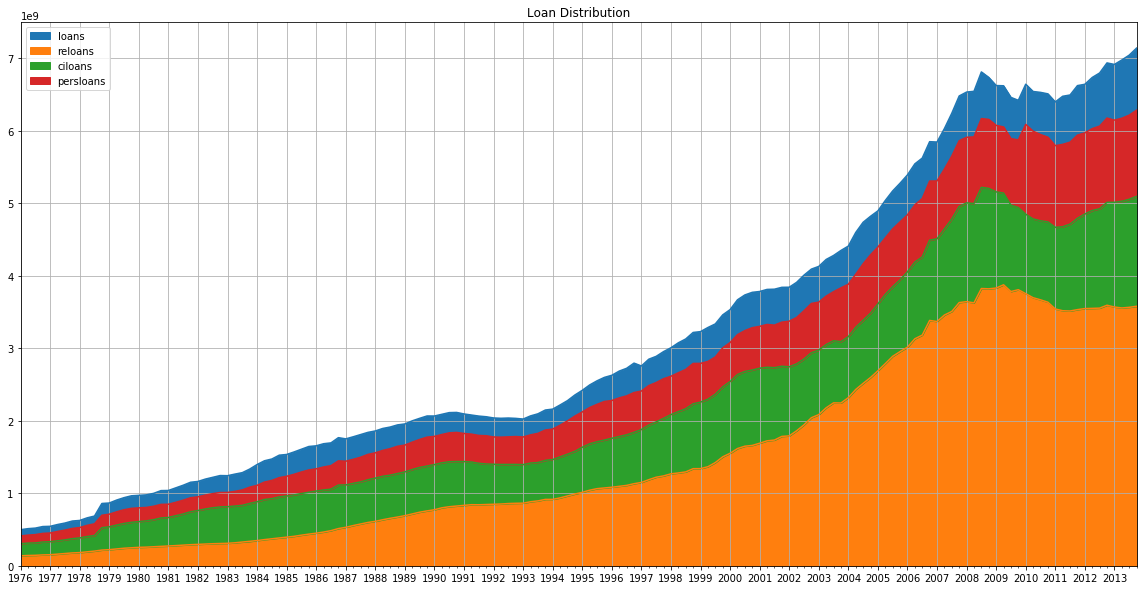

In [7]:
pivot_copy = pivot.copy()
pivot_copy = pivot.reset_index()
pivot_copy["re+ci"] = pivot_copy["reloans"] + pivot_copy["ciloans"]
pivot_copy["re+ci+pers"] = pivot_copy["re+ci"] + pivot_copy["persloans"]
#pivot_copy["re+ci+pers+ag"] = pivot_copy["re+ci+pers"] + pivot_copy["agloans"]
fig, ax = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,152,4))
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.set_xticklabels(years, rotation=60)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Loan Distribution")
pivot_copy.loans.plot.area(ax=ax)
#pivot_copy.agloans.plot(ax=ax)
#pivot_copy.persloans.plot(ax=ax)
#pivot_copy.ciloans.plot(ax=ax)
#pivot_copy.reloans.plot.area(ax=ax,stacked=True)
#pivot_copy["re+ci"].plot.area(ax=ax, stacked=True)
#pivot_copy["re+ci+pers"].plot(ax=ax)
#pivot_copy["re+ci+pers+ag"].plot(ax=ax)
pivot_copy.plot.area(ax=ax, y=["reloans", "ciloans", "persloans"])
ax.legend()
ax.grid()
#fig.("Loan Distribution")

['1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


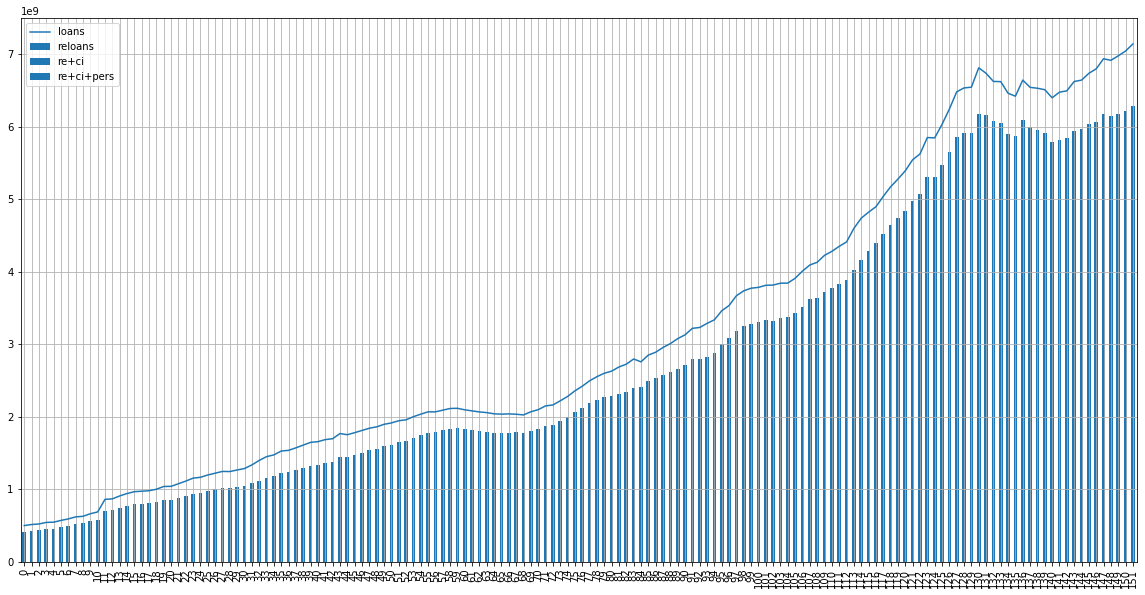

In [8]:
fig, ax1 = plt.subplots(figsize=(20,10))
#ax.set_xticks(range(0,152,4))
#ax.xaxis.set_major_locator(MultipleLocator(4))
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))
#ax.set_xticklabels(years, rotation=60)
pivot_copy.loans.plot(ax=ax1)
#pivot_copy.agloans.plot(ax=ax)
#pivot_copy.persloans.plot(ax=ax)
#pivot_copy.ciloans.plot(ax=ax)
pivot_copy.reloans.plot.bar(ax=ax1)
pivot_copy["re+ci"].plot.bar(ax=ax1)
pivot_copy["re+ci+pers"].plot.bar(ax=ax1)
#pivot_copy["re+ci+pers+ag"].plot.bar(ax=ax1)
ax1.legend()
ax1.grid()
print(years)

Security Distribution

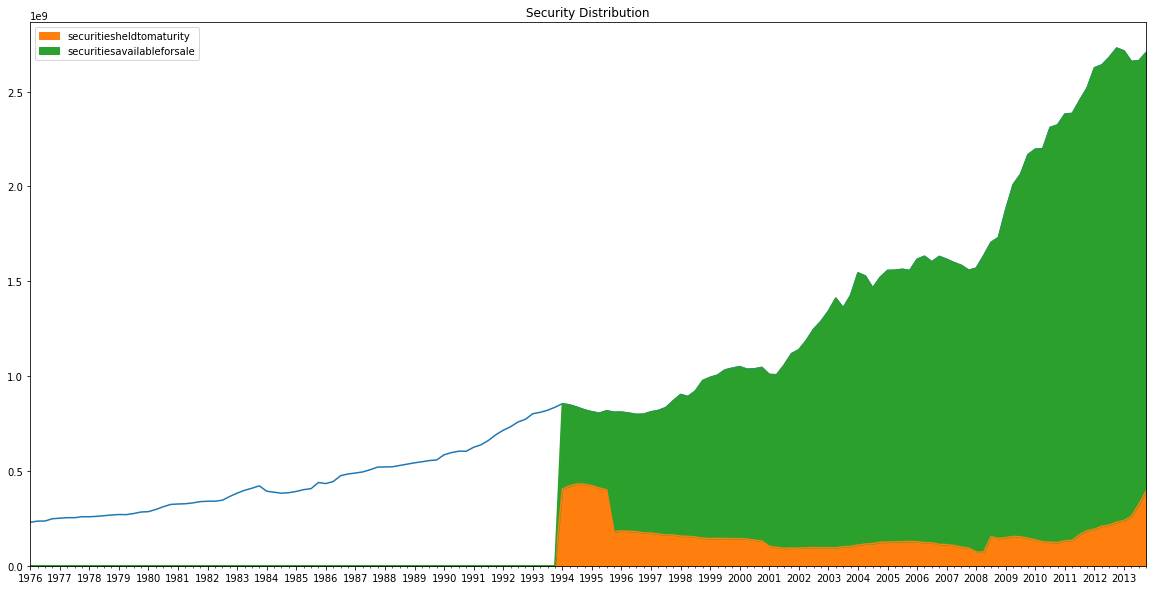

In [9]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","securities" ,"securitiesheldtomaturity", "securities_ammcost", "securitiesavailableforsale"]]
pivot1 = pd.pivot_table(df, index=["year", "quarter"], values=["securities" ,"securitiesheldtomaturity", "securities_ammcost", "securitiesavailableforsale"], aggfunc={"securities": np.sum, "securitiesheldtomaturity": np.sum, "securities_ammcost": np.sum,"securitiesavailableforsale": np.sum})
pivot1 = pivot1.reset_index()
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Security Distribution")
pivot1.securities.plot(ax=ax2)
pivot1.plot.area(ax=ax2, y=["securitiesheldtomaturity", "securitiesavailableforsale"])
ax.legend()
ax.grid()

Analysis of deposits

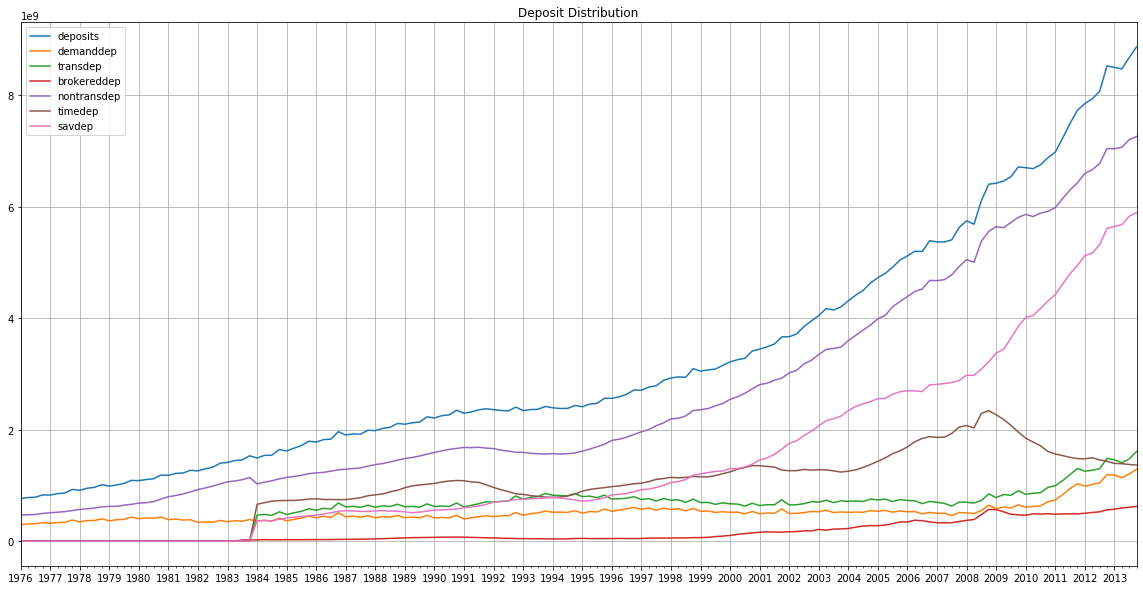

In [10]:
df = df_raw[["rssdid", "name", 'year', "quarter","deposits", "demanddep", "transdep","brokereddep" ,"timedepge100k", "timedeple100k", "timesavdep", "nontransdep", "timedep", "savdep"]]
pivot2 = pd.pivot_table(df, index=["year", "quarter"], values=["deposits", "demanddep", "transdep","brokereddep", "nontransdep", "timedep", "savdep"], aggfunc={"deposits": np.sum, "demanddep": np.sum, "transdep": np.sum, "brokereddep": np.sum,"nontransdep": np.sum, "timedep": np.sum, "savdep": np.sum})
pivot2 = pivot2.reset_index()
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
#pivot2.plot(ax=ax2)
pivot2.plot(ax=ax2, y=["deposits","demanddep", "transdep","brokereddep", "nontransdep", "timedep", "savdep"])
ax2.legend()
ax2.grid()

Non-Transaction deposits compared with time and saving deposits

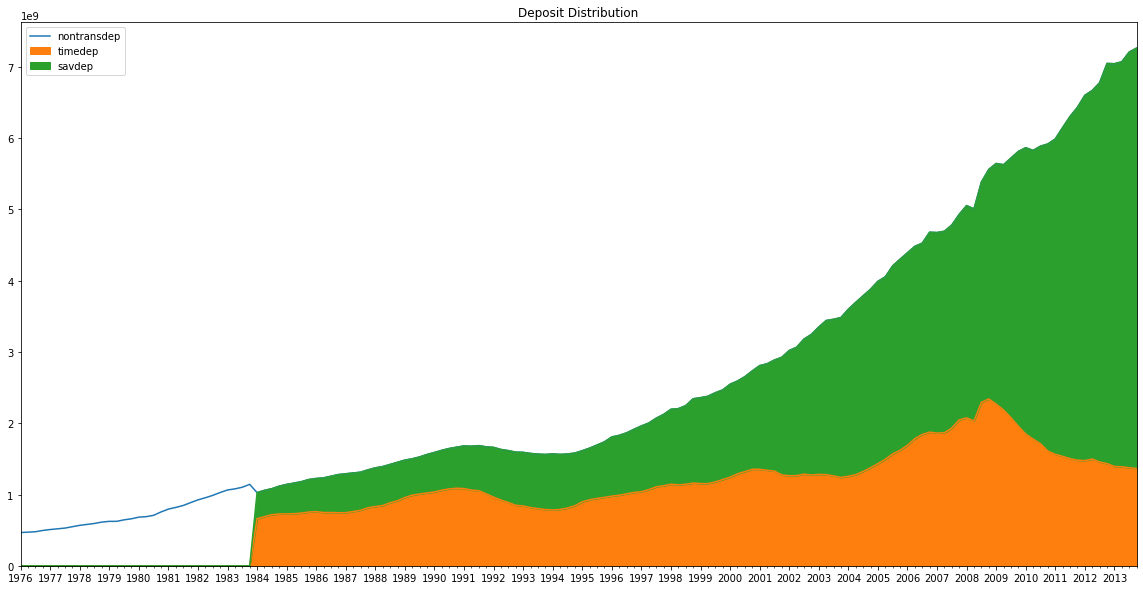

In [11]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.nontransdep.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["timedep", "savdep"])
ax2.legend()

Transaction deposits analysed.

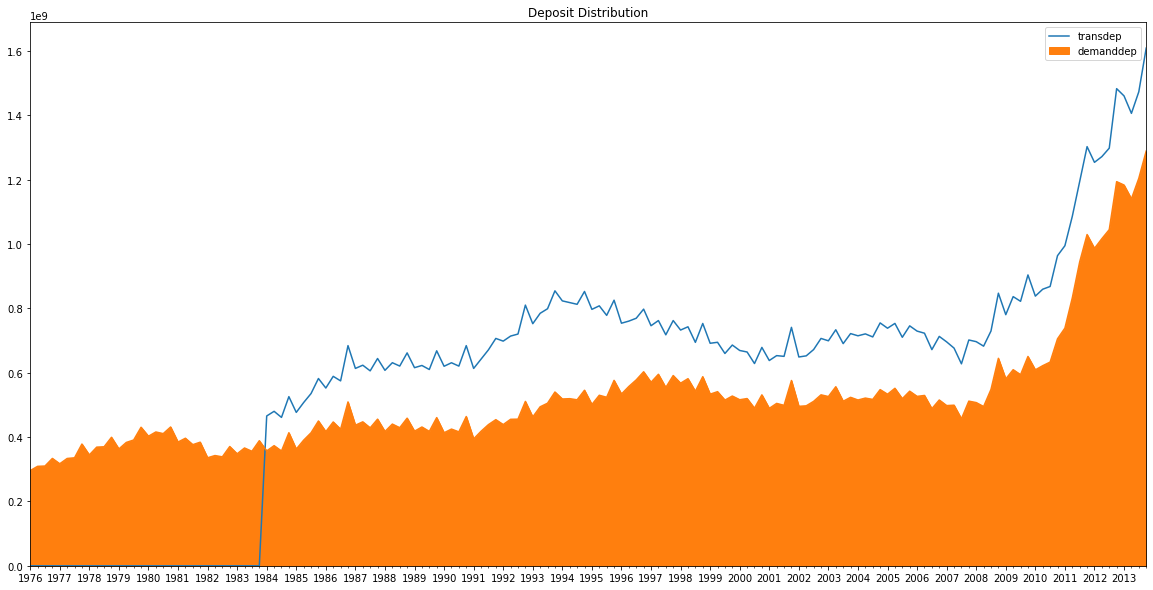

In [12]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.transdep.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["demanddep"])
ax2.legend()

Total deposits = transdep + nontransdep

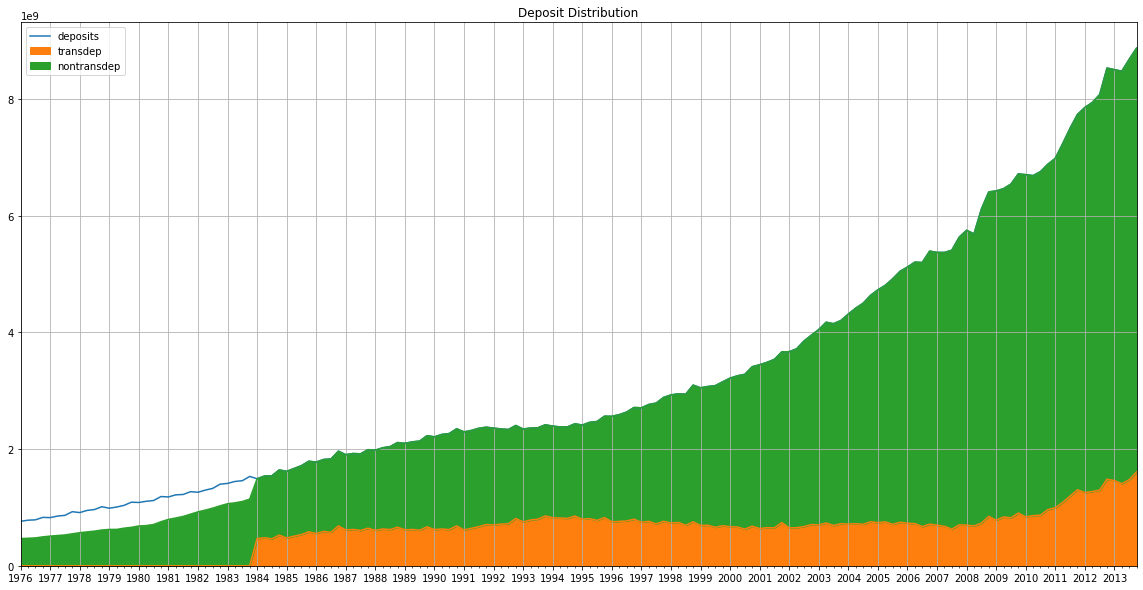

In [13]:
fig, ax2 = plt.subplots(figsize=(20,10))
ax2.set_xticks(range(0,152,4))
ax2.xaxis.set_major_locator(MultipleLocator(4))
ax2.set_xticklabels(years, rotation=60)
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_title("Deposit Distribution")
pivot2.deposits.plot(ax=ax2)
pivot2.plot.area(ax=ax2, y=["transdep", "nontransdep"])
ax2.legend()
ax2.grid()

Analysing liability side:

In [61]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities","subordinateddebt", "liabilities"]]
df_agg = df.groupby(["year", "quarter"]).sum()
df_agg =df_agg.reset_index()
df_agg["otherliab"] = df_agg["assets"] - (df_agg.iloc[:,4:11].sum(axis=1))
df_agg

,year,quarter,rssdid,assets,equity,fedfundsrepoliab,deposits,foreigndep,otherborrowedmoney,tradingliabilities,subordinateddebt,liabilities,otherliab
0,1976.0,1.0,7.380992e+09,1.073635e+09,6.751280e+07,57415924.0,7.619710e+08,1.420878e+08,7.798045e+06,0.0,4659122.0,1.006122e+09,32190192.0
1,1976.0,2.0,7.400314e+09,1.105135e+09,6.933909e+07,59634207.0,7.813385e+08,1.453992e+08,8.766644e+06,0.0,5094790.0,1.035796e+09,35562537.0
2,1976.0,3.0,7.392513e+09,1.119239e+09,7.088496e+07,64289054.0,7.875529e+08,1.482995e+08,8.820239e+06,0.0,5057128.0,1.048355e+09,34335681.0
3,1976.0,4.0,7.409692e+09,1.185900e+09,7.244036e+07,70828210.0,8.296174e+08,1.640299e+08,9.895570e+06,0.0,5284293.0,1.113460e+09,33804637.0
4,1977.0,1.0,7.398205e+09,1.189848e+09,7.382384e+07,73920160.0,8.256761e+08,1.641567e+08,9.807317e+06,0.0,5264563.0,1.116024e+09,37199022.0
5,1977.0,2.0,7.418879e+09,1.232257e+09,7.586728e+07,76841845.0,8.517403e+08,1.721184e+08,1.198494e+07,0.0,5521451.0,1.156389e+09,38182517.0
6,1977.0,3.0,7.398497e+09,1.267541e+09,7.786532e+07,80696101.0,8.645183e+08,1.845826e+08,1.332303e+07,0.0,5572838.0,1.189676e+09,40983329.0
7,1977.0,4.0,7.396260e+09,1.342907e+09,7.945901e+07,84131901.0,9.270863e+08,1.907582e+08,1.361215e+07,0.0,5904691.0,1.263448e+09,41954411.0
8,1978.0,1.0,7.373350e+09,1.342715e+09,8.117283e+07,90480039.0,9.118888e+08,1.959646e+08,1.379904e+07,0.0,5854394.0,1.261543e+09,43555471.0
9,1978.0,2.0,7.378716e+09,1.396934e+09,8.324296e+07,89664396.0,9.487910e+08,2.040228e+08,1.738761e+07,0.0,5833096.0,1.313691e+09,47992509.0


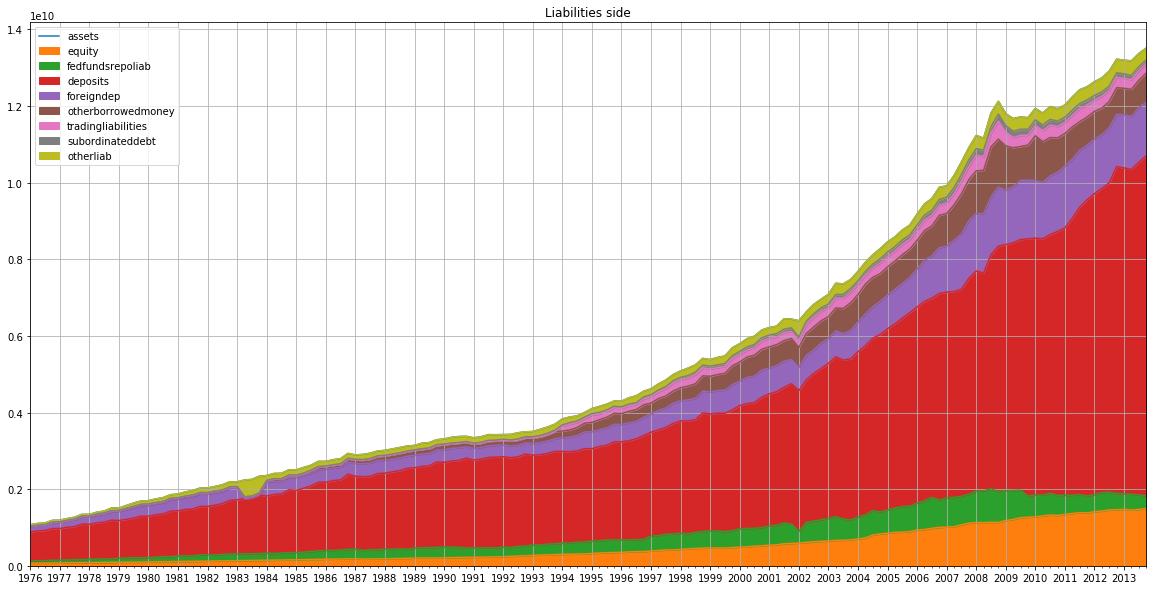

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.set_xticklabels(years, rotation=60)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Liabilities side")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["equity","fedfundsrepoliab" ,"deposits", "foreigndep", "otherborrowedmoney", "tradingliabilities", "subordinateddebt", "otherliab"])
ax.legend()
ax.grid()

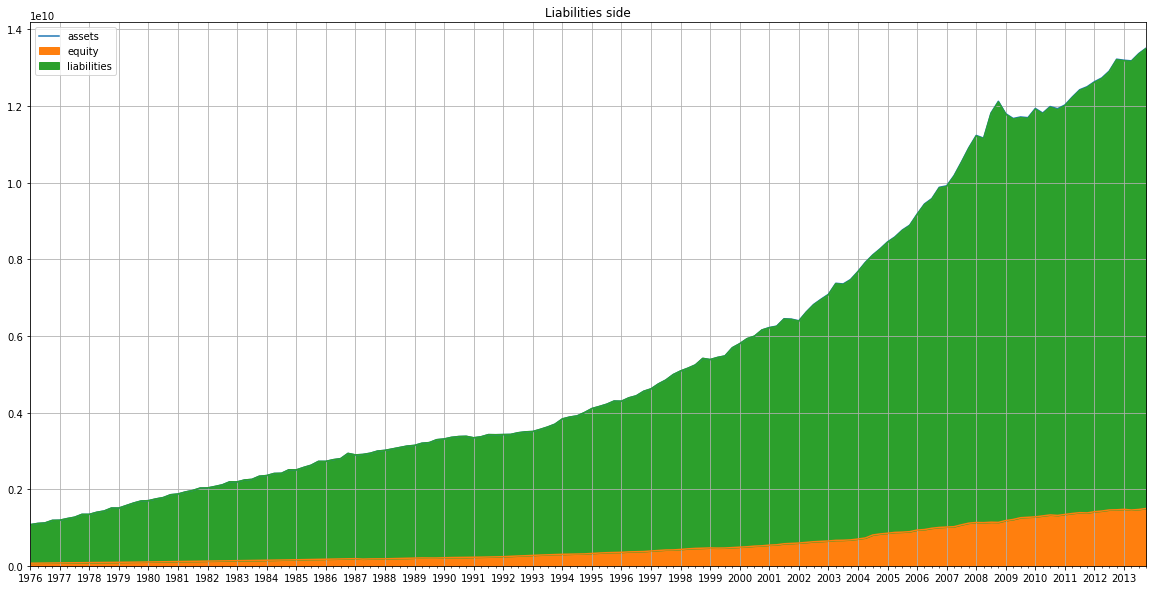

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(range(0,152,4))
ax.set_xticklabels(years, rotation=60)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Liabilities side")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["equity","liabilities"])
ax.legend()
ax.grid()

Analysing assets side:

In [17]:
df = df_raw[["rssdid", "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df_agg = df.groupby(["year", "quarter"]).sum()
df_agg =df_agg.reset_index()
df_agg["otherassets"] = df_agg["assets"] - (df_agg.iloc[:,4:10].sum(axis=1))
#df_agg.iloc[:,4:10]
df_agg

,year,quarter,rssdid,assets,cash,fedfundsrepoasset,securities,loansnet,tradingassets,interestratederivatives,otherassets
0,1976.0,1.0,7.380992e+09,1.073635e+09,1.838978e+08,36018634.0,2.292715e+08,5.646476e+08,0.0,0.0,5.979932e+07
1,1976.0,2.0,7.400314e+09,1.105135e+09,1.898554e+08,34720718.0,2.356722e+08,5.817447e+08,0.0,0.0,6.314197e+07
2,1976.0,3.0,7.392513e+09,1.119239e+09,1.874489e+08,36602041.0,2.361238e+08,5.936392e+08,0.0,0.0,6.542551e+07
3,1976.0,4.0,7.409692e+09,1.185900e+09,2.039932e+08,46401229.0,2.480889e+08,6.215177e+08,0.0,0.0,6.589929e+07
4,1977.0,1.0,7.398205e+09,1.189848e+09,1.983163e+08,44699487.0,2.508496e+08,6.275057e+08,0.0,0.0,6.847658e+07
5,1977.0,2.0,7.418879e+09,1.232257e+09,2.084960e+08,42159541.0,2.538045e+08,6.567370e+08,0.0,0.0,7.105964e+07
6,1977.0,3.0,7.398497e+09,1.267541e+09,2.200393e+08,42300589.0,2.536145e+08,6.804410e+08,0.0,0.0,7.114599e+07
7,1977.0,4.0,7.396260e+09,1.342907e+09,2.432755e+08,51116863.0,2.585585e+08,7.163844e+08,0.0,0.0,7.357152e+07
8,1978.0,1.0,7.373350e+09,1.342715e+09,2.342740e+08,46278307.0,2.585122e+08,7.276929e+08,0.0,0.0,7.595768e+07
9,1978.0,2.0,7.378716e+09,1.396934e+09,2.459044e+08,44191687.0,2.605611e+08,7.645133e+08,0.0,0.0,8.176384e+07


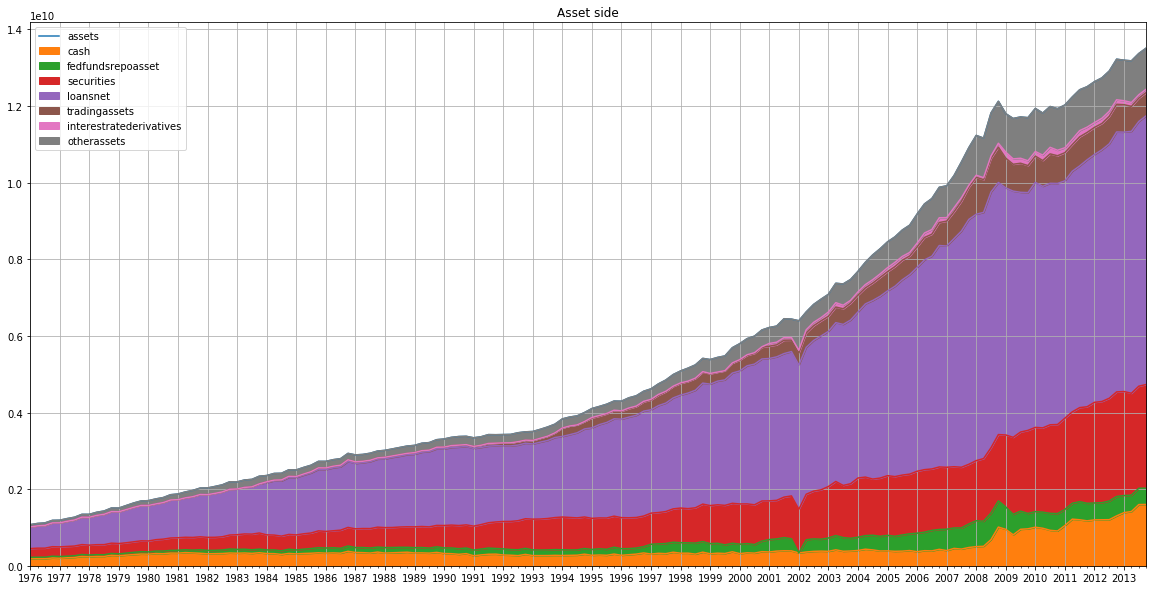

In [52]:
fig, ax = plt.subplots(figsize=(20,10))
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.set_xticklabels(years, rotation=60)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Asset side")
df_agg.assets.plot(ax=ax)
df_agg.plot.area(ax=ax, y=["cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives", "otherassets"])
ax.legend()
ax.grid()

Median Bank: Assets and Liabilities

In [19]:
df_assets = df_raw[["rssdid", "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df_liab = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities", "liabilities"]]
df_asset_median = df_assets.groupby(["year", "quarter"]).median()
df_liab_median = df_liab.groupby(["year", "quarter"]).median()
df_asset_median = df_asset_median.reset_index()
df_liab_median = df_liab_median.reset_index()
df_liab_median


,year,quarter,rssdid,assets,equity,fedfundsrepoliab,deposits,foreigndep,otherborrowedmoney,tradingliabilities,liabilities
0,1976.0,1.0,518859.0,15427.0,1256.0,0.0,13999.0,0.0,0.0,NaN,14197.0
1,1976.0,2.0,519300.0,15886.5,1295.0,0.0,14327.5,0.0,0.0,NaN,14636.5
2,1976.0,3.0,519183.5,16266.0,1346.0,0.0,14676.5,0.0,0.0,NaN,14952.0
3,1976.0,4.0,519146.0,16866.0,1348.0,0.0,15269.0,0.0,0.0,NaN,15524.0
4,1977.0,1.0,518859.0,17211.0,1398.0,0.0,15547.0,0.0,0.0,NaN,15790.0
5,1977.0,2.0,518849.5,17659.0,1433.5,0.0,15846.0,0.0,0.0,NaN,16161.5
6,1977.0,3.0,518429.5,18157.5,1488.5,0.0,16296.5,0.0,0.0,NaN,16683.5
7,1977.0,4.0,518279.0,19128.0,1492.0,0.0,17300.0,0.0,0.0,NaN,17569.0
8,1978.0,1.0,518550.0,19297.0,1551.0,0.0,17410.0,0.0,0.0,NaN,17753.0
9,1978.0,2.0,518617.0,20070.0,1602.5,0.0,18026.0,0.0,0.0,NaN,18469.0


In [104]:
df_liab_median_2000 = df_liab_median[(df_liab_median.year==2000) & (df_liab_median.quarter==4)]
df_liab_median_2000_T = df_liab_median_2000.T
df_liab_median_2000_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
df_liab_median_2000_T = df_liab_median_2000_T[df_liab_median_2000_T[99]!=0]

df_liab_median_2009 = df_liab_median[(df_liab_median.year==2009) & (df_liab_median.quarter==4)]
df_liab_median_2009_T = df_liab_median_2009.T
df_liab_median_2009_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
df_liab_median_2009_T.rename(columns={"data":135}, inplace=True)
df_liab_median_2009_T = df_liab_median_2009_T[df_liab_median_2009_T[135]!=0]

135
                         135
equity               14205.0
fedfundsrepoliab         0.0
deposits            117731.0
foreigndep               0.0
otherborrowedmoney    3000.0
tradingliabilities       0.0


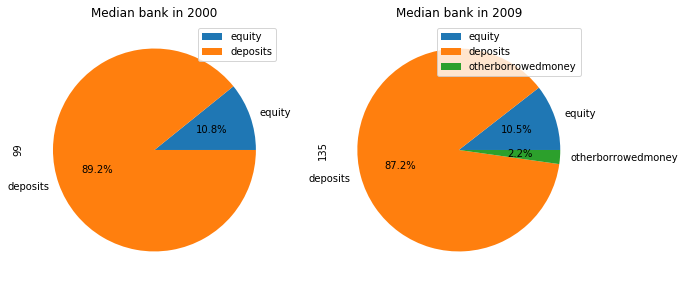

In [75]:
fig, ax = plt.subplots(1,2,figsize=(10,15)) 
#spezifische columns auswählen
#df_liab_median_2000.rename(columns={"99":"medianbank"}, inplace=True)
ax[0].set_title("Median bank in 2000")
ax[1].set_title("Median bank in 2009")
df_liab_median_2000_T.plot.pie(ax=ax[0], y=99,autopct='%1.1f%%')
df_liab_median_2009_T.plot.pie(ax=ax[1], y=135,autopct='%1.1f%%')

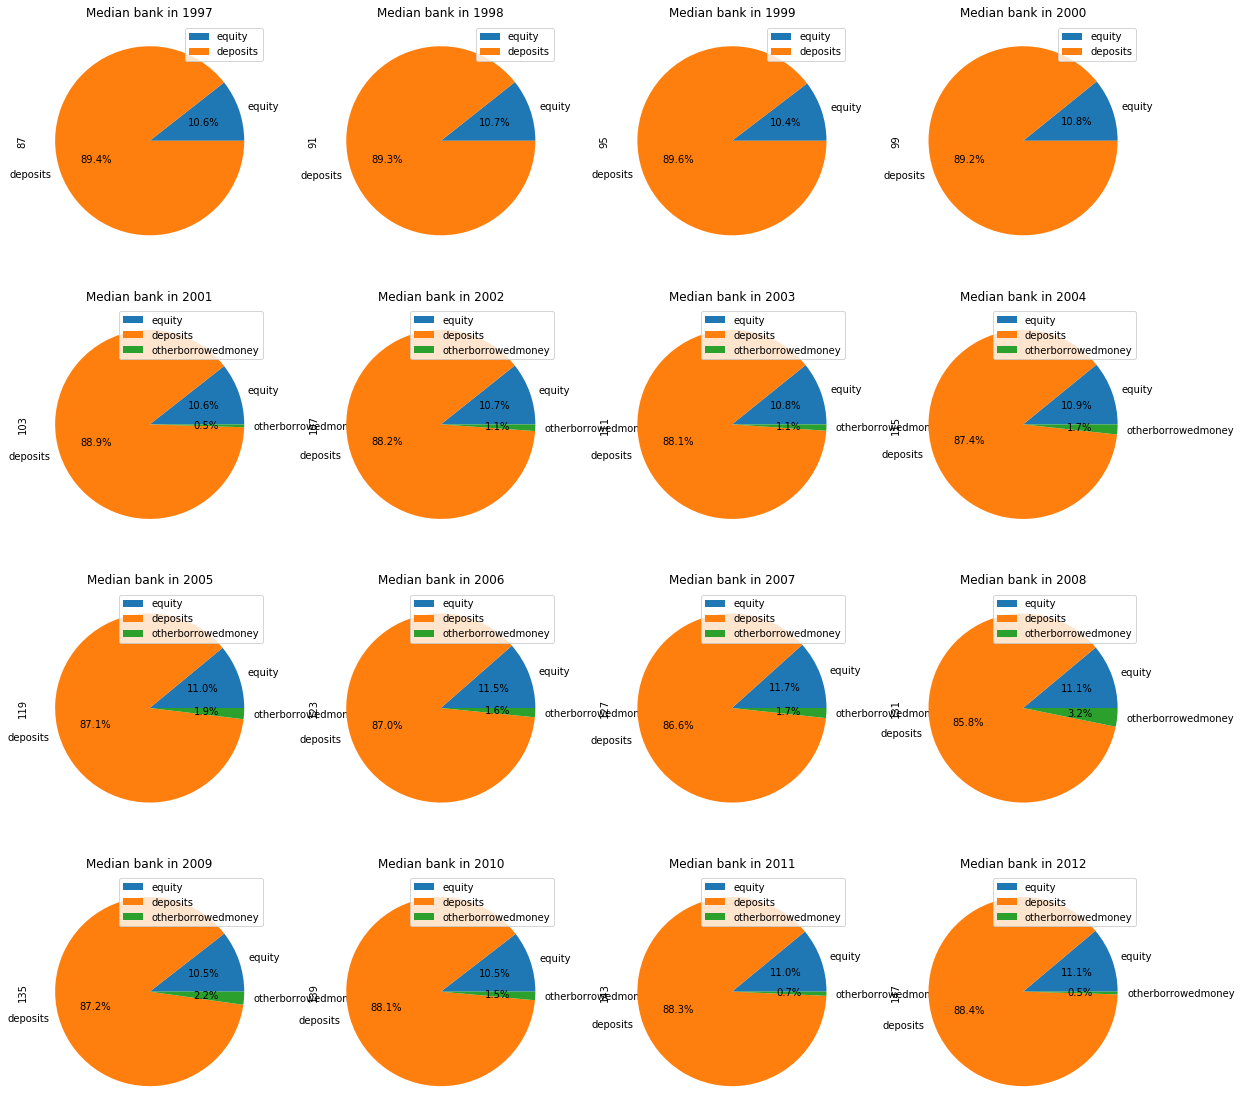

In [115]:
fig, ax = plt.subplots(4,4,figsize=(20,20))
ax = ax.ravel() 
year = 1997

for x in range(0,16):
    temp_df_liab = df_liab_median[(df_liab_median.year==year) & (df_liab_median.quarter==4)]
    
    temp_df_liab_T = temp_df_liab.T
    temp_df_liab_T.drop( ["rssdid","quarter","year", "assets", "liabilities"], axis=0, inplace=True)
    column_name = temp_df_liab_T.columns[0]
    temp_df_liab_T = temp_df_liab_T[temp_df_liab_T[column_name]!=0]
    ax[x].set_title("Median bank in " + str(year))
    temp_df_liab_T.plot.pie(ax=ax[x], y=column_name,autopct='%1.1f%%')
    year = year + 1